<a href="https://colab.research.google.com/github/basleal22/baslealwork/blob/main/project103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Constants
IMAGE_SIZE = (224, 224, 3)
NUM_CLASSES = 2
BATCH_SIZE = 32



In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Data preprocessing and augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# Load and augment the training data
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/project101/train',
                                               target_size=(224, 224),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

# Load the test data
test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/project101/test',
                                             target_size=(224, 224),
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

Found 2609 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
# Define the model
model_2= Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=IMAGE_SIZE),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model_2.fit(train_data,
          epochs=5,
          validation_data=test_data)


Epoch 1/5
82/82 [==============================] - 205s 2s/step - loss: 0.3914 - accuracy: 0.8103 - val_loss: 0.3491 - val_accuracy: 0.8288
Epoch 2/5
82/82 [==============================] - 201s 2s/step - loss: 0.3826 - accuracy: 0.8091 - val_loss: 0.3772 - val_accuracy: 0.8061
Epoch 3/5
82/82 [==============================] - 201s 2s/step - loss: 0.3763 - accuracy: 0.8095 - val_loss: 0.3551 - val_accuracy: 0.8076
Epoch 4/5
82/82 [==============================] - 195s 2s/step - loss: 0.3649 - accuracy: 0.8118 - val_loss: 0.3594 - val_accuracy: 0.8045
Epoch 5/5
82/82 [==============================] - 195s 2s/step - loss: 0.3615 - accuracy: 0.8252 - val_loss: 0.4074 - val_accuracy: 0.7818


In [ ]:
# Save the trained model
model_2.save('/content/drive/MyDrive/model_2.h5')

21/21 [==============================] - 14s 664ms/step


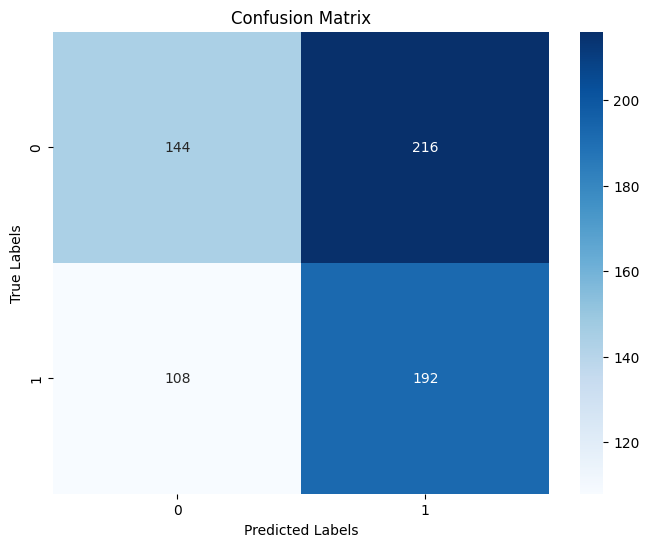

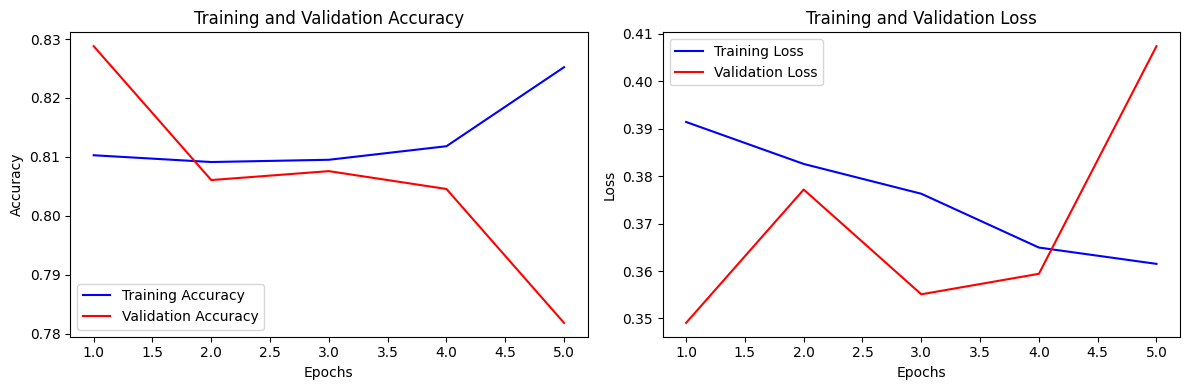

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have trained the model and loaded the test data

# Predict the labels for the test data
y_pred = model_2.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels for the test data
y_true = test_data.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot accuracy and loss curves
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
